# Outlier/Anomaly/Novelty Detection

In [21]:
######## Method-1 Using Standard deviation to detect outlier

'''if in a normal distribution of variable, 
   value > mean + 3* std  or value < mean -  3 * std, then that value should be treated as outlier
'''

import numpy as np

np.random.seed(1)

outlier_list = []

# using random numbers to generate real values
data = np.random.randn(50000)  * 25 + 25

# Function for Detection Outlier on 1-D dataset.

def outlier_detect(dataset):
    # Set upper and lower limit to 3 standard deviation
    dataset_std = np.std(dataset)
    dataset_mean = np.mean(dataset)
    
    lower_limit  = dataset_mean - dataset_std * 3 
    print("lower_limit:",lower_limit)
    upper_limit = dataset_mean + dataset_std * 3
    print("upper_limit:",upper_limit)
  
    # Get outliers
    for outlier in dataset:
        if outlier > upper_limit or outlier < lower_limit:
            outlier_list.append(outlier)
    return outlier_list

outlier_detect(data)

lower_limit: -49.95602832012464
upper_limit: 100.14545280681892


[100.77142780930076,
 123.96506760094908,
 108.0269689042591,
 -51.34410951065762,
 -53.83393625477622,
 -50.400799630232456,
 110.81658579488898,
 -51.60353390262752,
 118.50622259261473,
 103.37618350219768,
 105.95857991880942,
 -56.32585587441548,
 103.30074320351264,
 100.31886420593081,
 -54.765408670602014,
 -56.51537739441348,
 110.1075568937243,
 102.96198976956376,
 107.46351308201963,
 103.72460063049074,
 -57.37146016746286,
 -51.39083101035766,
 125.67122611368444,
 -55.47830264059604,
 102.7972957754181,
 115.3319251770787,
 109.95289141256066,
 114.02183301763871,
 -66.41100248136988,
 -57.05196990776544,
 114.01531619181044,
 -54.3365409335436,
 102.66873321431977,
 103.63422409243634,
 -57.77106405511498,
 -52.44566379811087,
 -57.00818992635725,
 100.65546235760888,
 -54.13025311692219,
 -52.81579155466066,
 101.99019432689131,
 129.20294194887737,
 120.85952552276757,
 -50.733599448078465,
 -60.898145250110375,
 -56.480151715991155,
 101.92697635551914,
 105.69840300

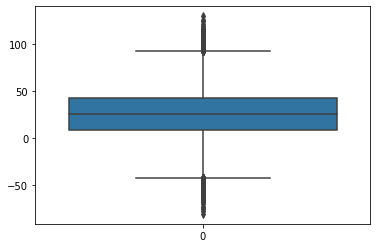

In [22]:
########### Method-2 Using Box plot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(data=data)